In [2]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

(1797, 64)


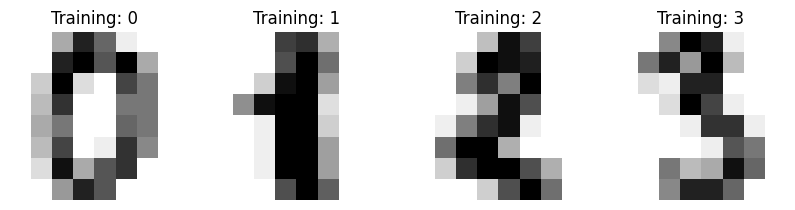

In [20]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print(data.shape)  # (1797, 64)

In [13]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=True
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

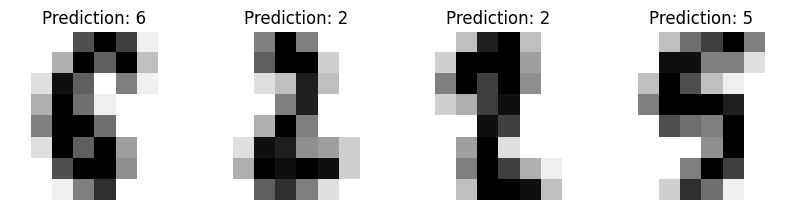

In [16]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       0.96      0.99      0.98       102
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00        94
           4       1.00      1.00      1.00        86
           5       0.99      0.99      0.99        88
           6       0.99      1.00      0.99        93
           7       1.00      0.99      0.99        92
           8       0.99      0.95      0.97        87
           9       0.99      0.99      0.99        86

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899


Confusion matrix:
[[ 78   0   0   0   0   0   0   0   0   0]
 [  0 101   0   0   0   0   0   0   1   0]
 [  0   0  93   0   0   0   0   0   0   0]
 [  0   0   0  94   0   0   0   0   0 

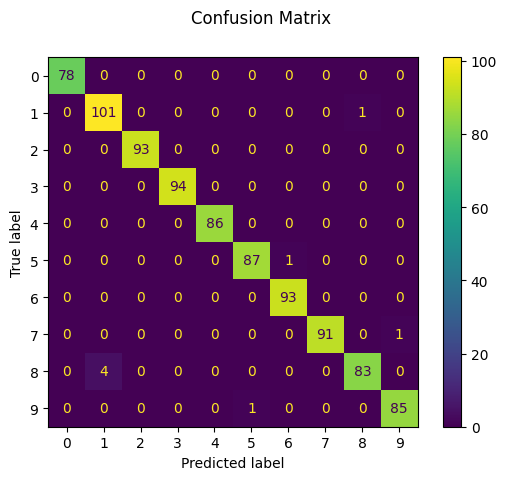

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       0.96      0.99      0.98       102
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00        94
           4       1.00      1.00      1.00        86
           5       0.99      0.99      0.99        88
           6       0.99      1.00      0.99        93
           7       1.00      0.99      0.99        92
           8       0.99      0.95      0.97        87
           9       0.99      0.99      0.99        86

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899




In [17]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)